# 3e. PCA + SMOTE

Now, I will use PCA (Principal Component Analysis) in addition to SMOTE (Synthetic Minority Oversampling Technique).  

PCA is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. 

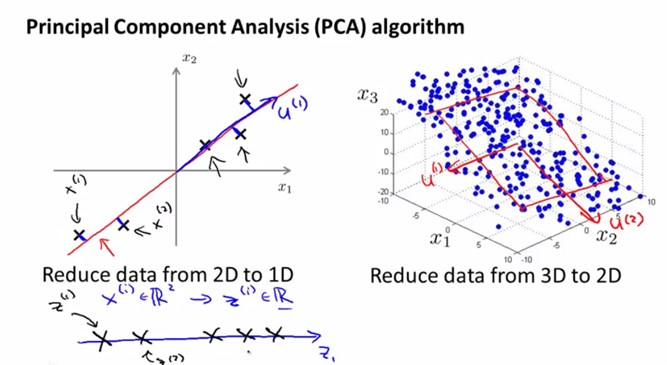

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.


Importantly, the dataset on which PCA technique is to be used must be scaled. The results are also sensitive to the relative scaling. As a layman, it is a method of summarizing data. Imagine some wine bottles on a dining table. Each wine is described by its attributes like colour, strength, age, etc. But redundancy will arise because many of them will measure related properties. So what PCA will do in this case is summarize each wine in the stock with less characteristics.           

Intuitively, Principal Component Analysis can supply the user with a lower-dimensional picture, a projection or "shadow" of this object when viewed from its most informative viewpoint.

To recap SMOTE, it is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.  

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

C:\Users\My_Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\My_Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\My_Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will b

In [2]:
# read the data into a DataFrame
df = pd.read_csv('2_explored.csv', index_col=0)

Here, I will vectorize the text and transform it to a matrix form so that I can feed the matrix to machine learning algorithms. Xs are the words and y is the rating stored in 'overall' column.

In [3]:
vect = CountVectorizer(ngram_range=(1,1))
                       
vect.fit(df.clean_text)
X = vect.transform(df.clean_text)

# transform the resulting sparse matrix into an array
my_array = X.toarray()

# check the vocabulary length
vocab = vect.get_feature_names()
print('Number of words in the vocabulary: ', len(vocab))

# back to df, assign column names
X_df = pd.DataFrame(my_array, columns = vocab)

# check the vector matrix
X_df.head()

Number of words in the vocabulary:  4248


,abartlan,abi,abicim,abilerim,abimiz,abimizin,ac,acaip,acar,acayip,...,zor,zordu,zorla,zorlandk,zorlu,zorluk,zorunda,zorundalar,zorundaydm,zorunlu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# assign the target variable 'overall' to y
y = df.rating

We will train the data on one set and test on a set not seen before to reduce bias.

In [5]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123,
                                                    stratify = y)

# Check shapes before applying SMOTE
print ('Shape of word vector feature matrix in the training set: ', X_train.shape)
print ('Shape of word vector target variable matrix in the training set: ', y_train.shape)

Shape of word vector feature matrix in the training set:  (850, 4248)
Shape of word vector target variable matrix in the training set:  (850,)


In [6]:
# Check the imbalance
y_train.value_counts()

1    660
0    190
Name: rating, dtype: int64

In [7]:
# Apply PCA
pca = PCA(n_components=None, random_state=123)
X_pca_train = pca.fit_transform(X_train.toarray())
X_pca_test = pca.transform(X_test.toarray())

# Apply SMOTE to correct the imbalance
sm = SMOTE(random_state=123)
X_pca_sm_train, y_pca_sm_train = sm.fit_sample(X_pca_train, y_train)

# Check shapes after applying SMOTE
print ('Shape of word vector feature matrix in the SMOTEd training set: ', X_pca_sm_train.shape)
print ('Shape of word vector target variable matrix in the SMOTEd training set: ', y_pca_sm_train.shape)

Shape of word vector feature matrix in the SMOTEd training set:  (1320, 850)
Shape of word vector target variable matrix in the SMOTEd training set:  (1320,)


In [8]:
# Check if imbalance gone
Counter(y_pca_sm_train)

Counter({1: 660, 0: 660})

I will define a function to better visualize the test results given by the confusion matrix.

In [9]:
# Function for plotting a good-looking confusion matrix

def plot_confusion_matrix(y_test, y_pred, title, color):
    
    '''This function takes as input: 
            a target test variable y_test (pandas series of type integer), 
            a target predicted variable y_pred (pandas series of type integer), 
            a colormap color (string) and 
            a title (string). 
        It plots a confusion matrix of y_test and y_pred with the input colormap.
    '''
    
    cm_ratio = np.round(confusion_matrix(y_test, y_pred) / len(y_test), decimals=2)
    fig = plt.figure(figsize=(4, 4))
    plt.clf()
    plt.style.use('classic')
    plt.imshow(cm_ratio, interpolation='nearest', cmap=color)
    classNames = ['Neg_Review',' Pos_Review']
    plt.title(title, fontsize=20)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=15)
    plt.yticks(tick_marks, classNames, fontsize=15, rotation=90)
    s = [['TNR','FPR'], ['FNR', 'TPR']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm_ratio[i][j]), fontsize=15, 
                 fontweight='bold', horizontalalignment="center")
    return plt.show()

I will code a function to facilitate fitting a classifier to training data, predicting on test data, printing the accuracy and cross validation scores along with the classification report and showing the confusion matrix results using the function above.

In [10]:
def fit_predict_print_plot(my_classifier, my_title):
    
    '''This function takes an instance of a classifier and my_title string, fits to training data, 
    predicts on test data, prints and plots the results'''
    
    # Fitting the classifier to the training data split
    my_classifier.fit(X_train, y_train)

    # Predicting on the test split
    y_predicted = my_classifier.predict(X_test)

    # Checking the accuracy and the cross validation scores
    print('accuracy on training set: ', my_classifier.score(X_train, y_train))
    print('accuracy on test set: ', accuracy_score(y_test, y_predicted))
    print('croos validation score on whole data set: ', 
          np.mean(cross_val_score(my_classifier, X, y, cv = 5)), '\n')

    # Checking the results with the Classification report
    print (classification_report(y_test, y_predicted))
    
    # Checking the results visually by Plotting the confusion matrix with "plot_confusion_matrix" function I defined above
    plot_confusion_matrix(y_test, y_predicted, 
                      title = my_title, 
                      color=plt.cm.Set3)
    return(y_predicted)

Starting with logistic regression, I will use 12 different classification algorithms to predict the ratings of the reviews. Namely: Logistic Regression, K-Nearest Neighbors, Linear Support Vector Machines (SVM), Kernel SVM, Naive Bayes, Decision Trees, Random Forest, AdaBoost, Gradient Boosting, Stochastic Gradient Boosting, Extreme Gradient Boosting (XGBoost) and CatBoost.

## 3.1. Logistic Regression

accuracy on training set:  0.971764705882353
accuracy on test set:  0.8309859154929577
croos validation score on whole data set:  0.847603862166711 

              precision    recall  f1-score   support

           0       0.83      0.31      0.45        48
           1       0.83      0.98      0.90       165

    accuracy                           0.83       213
   macro avg       0.83      0.65      0.68       213
weighted avg       0.83      0.83      0.80       213



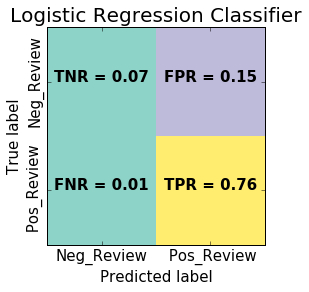

In [11]:
# Instantiating the logistic regression classifier logreg
logreg = LogisticRegression(penalty = 'l2', C = 1, solver='newton-cg', random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_logreg = fit_predict_print_plot(logreg, 'Logistic Regression Classifier')

## 3.2. K-Neighbors Classifier

accuracy on training set:  0.8611764705882353
accuracy on test set:  0.7981220657276995
croos validation score on whole data set:  0.8014970325095225 

              precision    recall  f1-score   support

           0       0.65      0.23      0.34        48
           1       0.81      0.96      0.88       165

    accuracy                           0.80       213
   macro avg       0.73      0.60      0.61       213
weighted avg       0.77      0.80      0.76       213



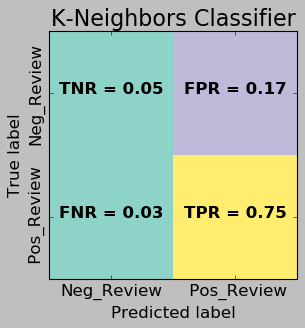

In [12]:
# Instantiating the KNeighborsClassifier knn
knn = KNeighborsClassifier(n_neighbors=5)

# Calling the fit_predict_print_plot function I defined above
y_predicted_knn = fit_predict_print_plot(knn, 'K-Neighbors Classifier')

## 3.3. Linear SVM

accuracy on training set:  0.9952941176470588
accuracy on test set:  0.8591549295774648
croos validation score on whole data set:  0.862680485428293 

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        48
           1       0.87      0.96      0.91       165

    accuracy                           0.86       213
   macro avg       0.83      0.73      0.76       213
weighted avg       0.85      0.86      0.85       213



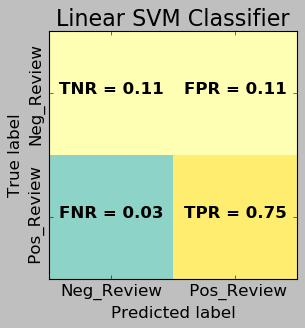

In [13]:
# Instantiating the KNeighborsClassifier knn
l_svm = SVC(kernel='linear', random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_l_svm = fit_predict_print_plot(l_svm, 'Linear SVM Classifier')

## 3.4. Kernel SVM

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



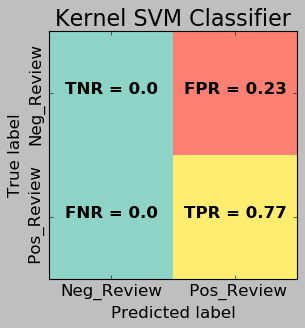

In [14]:
# Instantiating the KNeighborsClassifier knn
k_svm = SVC(kernel='rbf', gamma='auto')

# Calling the fit_predict_print_plot function I defined above
y_predicted_k_svm = fit_predict_print_plot(k_svm, 'Kernel SVM Classifier')

## 3.5. Decision Tree Classifier

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



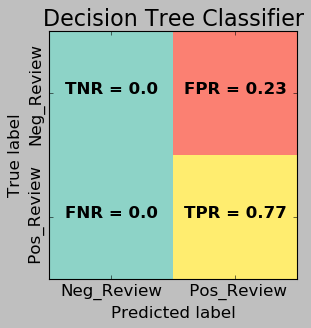

In [15]:
# Instantiating the Decision Tree Classifier dt
dt = DecisionTreeClassifier(max_depth = 6, max_features = 0.6, 
                             min_samples_leaf = 0.08, random_state = 123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_dt = fit_predict_print_plot(dt, 'Decision Tree Classifier')

## 3.6. Random Forest 

accuracy on training set:  0.9988235294117647
accuracy on test set:  0.8262910798122066
croos validation score on whole data set:  0.8626583399769687 

              precision    recall  f1-score   support

           0       0.76      0.33      0.46        48
           1       0.83      0.97      0.90       165

    accuracy                           0.83       213
   macro avg       0.80      0.65      0.68       213
weighted avg       0.82      0.83      0.80       213



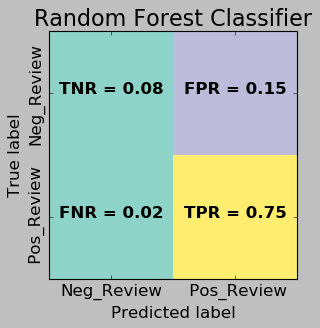

In [16]:
# Instantiating the Random Forest Classifier rf
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_rf = fit_predict_print_plot(rf, 'Random Forest Classifier')

## 3.7. AdaBoosting

accuracy on training set:  0.7764705882352941
accuracy on test set:  0.7746478873239436
croos validation score on whole data set:  0.7761094871113473 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.77      1.00      0.87       165

    accuracy                           0.77       213
   macro avg       0.39      0.50      0.44       213
weighted avg       0.60      0.77      0.68       213



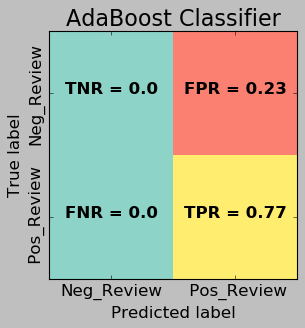

In [17]:
# Instantiating the AdaBoost Classifier adb
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)

# Calling the fit_predict_print_plot function I defined above
y_predicted_adb = fit_predict_print_plot(adb, 'AdaBoost Classifier')

## 3.8. GradientBoosting

accuracy on training set:  0.9870588235294118
accuracy on test set:  0.8215962441314554
croos validation score on whole data set:  0.8447736734874658 

              precision    recall  f1-score   support

           0       0.68      0.40      0.50        48
           1       0.84      0.95      0.89       165

    accuracy                           0.82       213
   macro avg       0.76      0.67      0.70       213
weighted avg       0.81      0.82      0.80       213



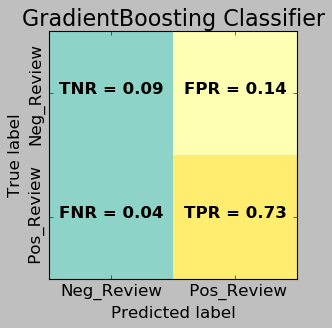

In [18]:
# Instantiating the GradientBoosting Classifier gbt
gbt = GradientBoostingClassifier(n_estimators=300, max_depth =3, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_gbt = fit_predict_print_plot(gbt, 'GradientBoosting Classifier')

## 3.9. Stochastic Gradient Boosting

accuracy on training set:  0.991764705882353
accuracy on test set:  0.8169014084507042
croos validation score on whole data set:  0.8541677739392328 

              precision    recall  f1-score   support

           0       0.67      0.38      0.48        48
           1       0.84      0.95      0.89       165

    accuracy                           0.82       213
   macro avg       0.75      0.66      0.68       213
weighted avg       0.80      0.82      0.80       213



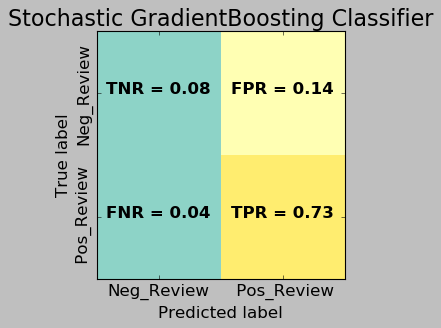

In [19]:
# Instantiating the Stochastic GradientBoosting Classifier sgbt
sgb = GradientBoostingClassifier(max_depth=3, subsample=0.8, 
                                   max_features=0.2, n_estimators=300, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_sgb = fit_predict_print_plot(sgb, 'Stochastic GradientBoosting Classifier')

## 3.10. XGBoost

accuracy on training set:  0.8752941176470588
accuracy on test set:  0.812206572769953
croos validation score on whole data set:  0.8334927805828682 

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        48
           1       0.82      0.98      0.89       165

    accuracy                           0.81       213
   macro avg       0.78      0.61      0.63       213
weighted avg       0.80      0.81      0.77       213



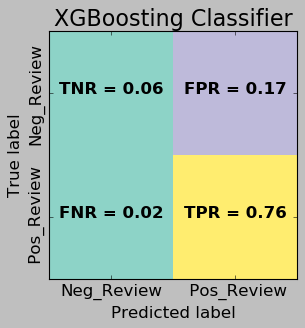

In [20]:
# Instantiating the XGBoosting Classifier xgb
xgb = XGBClassifier(random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_xgb = fit_predict_print_plot(xgb, 'XGBoosting Classifier')

## 3.11. CatBoost

accuracy on training set:  0.9247058823529412
accuracy on test set:  0.8169014084507042
croos validation score on whole data set:  0.8457259278944106 

              precision    recall  f1-score   support

           0       0.68      0.35      0.47        48
           1       0.84      0.95      0.89       165

    accuracy                           0.82       213
   macro avg       0.76      0.65      0.68       213
weighted avg       0.80      0.82      0.79       213



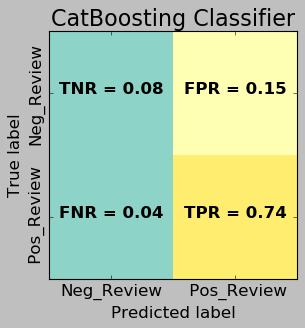

In [21]:
# Instantiating the Cat Boosting Classifier cb
cb = CatBoostClassifier(verbose=False, random_state=123)

# Calling the fit_predict_print_plot function I defined above
y_predicted_cb = fit_predict_print_plot(cb, 'CatBoosting Classifier')

## 3.12. Naive Bayes

accuracy on training set:  0.96
accuracy on test set:  0.8544600938967136
croos validation score on whole data set:  0.8701612188856409 

              precision    recall  f1-score   support

           0       0.73      0.56      0.64        48
           1       0.88      0.94      0.91       165

    accuracy                           0.85       213
   macro avg       0.81      0.75      0.77       213
weighted avg       0.85      0.85      0.85       213



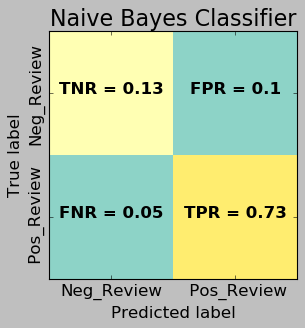

In [22]:
X_train = abs(X_train) # Naive Bayes can't handle negative values

# Instantiating the Naive Bayes Classifier nb
nb = MultinomialNB()

# Calling the fit_predict_print_plot function I defined above
y_predicted_nb = fit_predict_print_plot(nb, 'Naive Bayes Classifier')

## Comparison of results

I will use two functions to build a DataFrame for comparison.

In [23]:
# Function for converting the classification report results to a dataframe

def get_classification_report(y_true, y_pred):
    
    '''This function takes in true (y_true) and predicted (y_pred) values of a target variable and produces 
    a classification report '''
    
    metrics_summary = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred)

    avg = list(precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(list(metrics_summary), index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

In [24]:
# Function for adding explanatory columns and organizing the dataframe

def build_comparison_matrix(y_test, y_pred, algorithm, vector):
    
    '''This function builds a comparison matrix as a DataFrame, given target variable test and prediction values
    as pandas Series of integers, name of the algorithm of type string and name of the word vectorizer as string'''
    
    df = get_classification_report(y_test, y_pred)
    df['class']=['neg_review', 'pos_review', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = algorithm
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    
    return df

In [25]:
#For loop using above functions to build CountVectorizing results table

frames = [] # empty list for collecting dataframes

y_preds = [y_predicted_logreg, y_predicted_knn, y_predicted_l_svm, y_predicted_k_svm, y_predicted_nb, y_predicted_dt,
                y_predicted_rf, y_predicted_adb, y_predicted_gbt, y_predicted_sgb, y_predicted_xgb, y_predicted_cb] 

labels = ['LogReg', 'KNN', 'LSVM', 'KSVM', 'NBayes', 'DTree', 
             'RForest', 'ABoost', 'GBoost', 'SGBoost', 'XGBoost', 'CBoost'] 

vector = 'CVec_PCA_SMOTEd'

for y_pred, label in zip(y_preds, labels):
    df = build_comparison_matrix(y_test, y_pred, label, vector)
    frames.append(df)

# concatenating all dataframes
df_countvec = pd.concat(frames)

df_countvec2 = df_countvec.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [26]:
df_countvec2

precision    recall  f1-score  \
vectorizer      model   accuracy class                                       
CVec_PCA_SMOTEd LogReg  0.830986 neg_review   0.833333  0.312500  0.454545   
                                 pos_review   0.830769  0.981818  0.900000   
                                 average      0.831347  0.830986  0.799616   
                KNN     0.798122 neg_review   0.647059  0.229167  0.338462   
                                 pos_review   0.811224  0.963636  0.880886   
                                 average      0.774229  0.798122  0.758650   
                LSVM    0.859155 neg_review   0.800000  0.500000  0.615385   
                                 pos_review   0.868852  0.963636  0.913793   
                                 average      0.853336  0.859155  0.846546   
                KSVM    0.774648 neg_review   0.000000  0.000000  0.000000   
                                 pos_review   0.774648  1.000000  0.873016   
                                 average      0.600079  0.774648  0.676280   
                NBayes  0.854460 neg_review   0.729730  0.562500  0.635294   
                                 pos_review   0.880682  0.939394  0.909091   
                                 average      0.846664  0.854460  0.847390   
                DTree   0.774648 neg_review   0.000000  0.000000  0.000000   
                                 pos_review   0.774648  1.000000  0.873016   
                                 average      0.600079  0.774648  0.676280   
                RForest 0.826291 neg_review   0.761905  0.333333  0.463768   
                                 pos_review   0.833333  0.969697  0.896359   
                                 average      0.817237  0.826291  0.798873   
                ABoost  0.774648 neg_review   0.000000  0.000000  0.000000   
                                 pos_review   0.774648  1.000000  0.873016   
                                 average      0.600079  0.774648  0.676280   
                GBoost  0.821596 neg_review   0.678571  0.395833  0.500000   
                                 pos_review   0.843243  0.945455  0.891429   
                                 average      0.806134  0.821596  0.803219   
                SGBoost 0.816901 neg_review   0.666667  0.375000  0.480000   
                                 pos_review   0.838710  0.945455  0.888889   
                                 average      0.799939  0.816901  0.796745   
                XGBoost 0.812207 neg_review   0.750000  0.250000  0.375000   
                                 pos_review   0.817259  0.975758  0.889503   
                                 average      0.802102  0.812207  0.773558   
                CBoost  0.816901 neg_review   0.680000  0.354167  0.465753   
                                 pos_review   0.835106  0.951515  0.889518   
                                 average      0.800153  0.816901  0.794022   

                                             support  
vectorizer      model   accuracy class                
CVec_PCA_SMOTEd LogReg  0.830986 neg_review     48.0  
                                 pos_review    165.0  
                                 average       213.0  
                KNN     0.798122 neg_review     48.0  
                                 pos_review    165.0  
                                 average       213.0  
                LSVM    0.859155 neg_review     48.0  
                                 pos_review    165.0  
                                 average       213.0  
                KSVM    0.774648 neg_review     48.0  
                                 pos_review    165.0  
                                 average       213.0  
                NBayes  0.854460 neg_review     48.0  
                                 pos_review    165.0  
                                 average       213.0  
                DTree   0.774648 neg_review     48.0  
                                 pos_review    165.0  
                                 av

### Function for plotting F1 Scores of ML models

In [27]:
def f1_score_bar_plot(df, category, title):

    '''This function plots F1 scores from the given DataFrame and class'''
    
    plt.style.use('seaborn-pastel')
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('blue')
    b_plot[z].set_color('magenta')
    
    for i,v in enumerate(y_round):
        plt.text(i-.2, 0.018, str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend(loc='upper right')
    
    return plt.show()

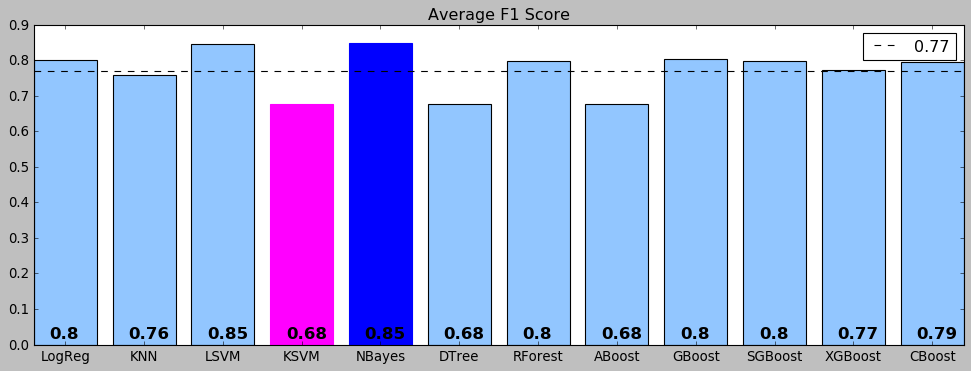

In [28]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_countvec, category='average', title= "Average F1 Score")

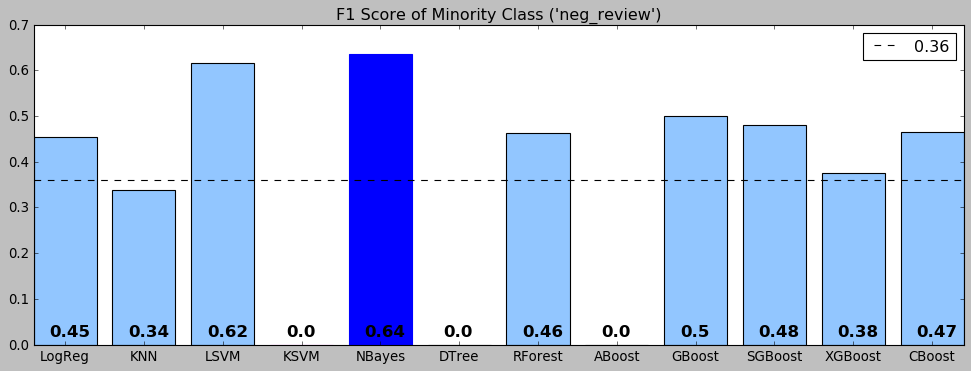

In [29]:
# Plotting f1 score of minority class ('bad') with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_countvec, category='neg_review', title= "F1 Score of Minority Class ('neg_review')")

- The best scores using PCA+SMOTE with Count Vectorizer, both in average and minority class F1 score was made by Naive Bayes: 0.85 and 0.64 respectively.  
- KSVM, Decision Tree and AdaBoost share the lowest average score of 0.68 and minority score of 0.
- I will save the results for further comparison.

In [30]:
df_countvec2.to_csv('3e_CountVec_PCA+SMOTEd.csv', sep=',', encoding='utf-8')